<a href="https://colab.research.google.com/github/csharpshooter/EVA/blob/master/A13/A13-B/A13-B-1000-Epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!git clone https://github.com/csharpshooter/YoloV3-1.git

Cloning into 'YoloV3-1'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (669/669), done.
remote: Compressing objects: 100% (661/661), done.
remote: Total 1569 (delta 5), reused 665 (delta 3), pack-reused 900
Receiving objects: 100% (1569/1569), 48.13 MiB | 31.04 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cp "/content/gdrive/My Drive/models/yolov3-spp-ultralytics.pt" /content/YoloV3-1/weights

In [27]:
cd YoloV3-1


/content/YoloV3-1/YoloV3-1


In [0]:
# mkdir weights

In [0]:
# import requests  
# file_url = "https://doc-04-c0-docs.googleusercontent.com/docs/securesc/e29mdrr3r4bkj8jacbkdcpg4avvmbvup/javcr721qh6vo4g5d3aact8tbtgt5f2a/1587568650000/18003229793517042864/11181435201463092605/1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4?e=download&authuser=0&nonce=gmb04jjifn00g&user=11181435201463092605&hash=htai7p0j65bvj4e3a52j993mbmv5bc3u"
    
# r = requests.get(file_url, stream = True)  
  
# with open("/content/YoloV3-1/weights/yolov3-spp-ultralytics.pt", "wb") as file:  
#     for block in r.iter_content(chunk_size = 1024): 
#          if block:  
#              file.write(block)  

In [28]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [29]:
ls

 cfg/           README.md      test_batch0.png   'ubdivisions=1'
 data/          results.json   test.py            utils/
 detect.py      results.png    ting               vim.exe.stackdump
 models.py      results.txt    train_batch0.png   weights/
 __pycache__/   runs/          train.py


In [0]:
# !git pull

In [0]:
# !ls

In [30]:
!python train.py --data data/customdata/custom.data --batch 3 --cache --epochs 3 --nosave --cfg cfg/yolov3-custom.cfg --single-cls


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=True, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 05:31:56.091832: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2813      0 --:--:-- --:--:-- --:--:--  2813
  0     0    0     0    0     0   

In [0]:
# !python3 -c "from utils import utils; utils.plot_results()"  # plot training results

In [31]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 1000 --nosave --single-cls

Streaming output truncated to the last 5000 lines.
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 51/51 [00:10<00:00,  4.79it/s]
                 all       503       510     0.489     0.612     0.521     0.543

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     2/999     12.3G      3.66       1.6         0      5.27         6       512: 100% 51/51 [00:33<00:00,  1.52it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 51/51 [00:09<00:00,  5.16it/s]
                 all       503       510     0.285     0.545     0.354     0.375

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     3/999     12.3G      3.78      1.32         0      5.11         6       512: 100% 51/51 [00:33<00:00,  1.52it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 51/51 [00:11<00:00,  4.40it/s]
                 all       503   

In [0]:
cp weights/last.pt "/content/gdrive/My Drive/yolo_v3/"

In [33]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo_v3/output', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/503 data/customdata/images/249-dji-mavic-mini-teplyk-260nw-1707551299.jpg: 256x512 1 drones, Done. (0.016s)
image 2/503 data/customdata/images/249-dji-mavic-mini-teplyk-260nw-1707551302.jpg: 384x512 1 drones, Done. (0.018s)
image 3/503 data/customdata/images/249-dji-mavic-mini-teplyk-260nw-1707551305.jpg: 320x512 1 drones, Done. (0.016s)
image 4/503 data/customdata/images/agonda-beach-goaindia-february-22-260nw-1677326701.jpg: 512x384 1 drones, Done. (0.018s)
image 5/503

In [34]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4"

Streaming output truncated to the last 5000 lines.
video 1/1 (2608/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2609/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2610/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2611/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2612/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2613/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2614/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing the Phantom 4.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2615/7604) /content/gdrive/My Drive/yolo_v3/DJI - Introducing t

In [35]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4"

Streaming output truncated to the last 5000 lines.
video 1/1 (2388/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 Done. (0.015s)
video 1/1 (2389/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 Done. (0.015s)
video 1/1 (2390/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 Done. (0.015s)
video 1/1 (2391/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 Done. (0.015s)
video 1/1 (2392/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2393/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 1 drones, Done. (0.015s)
video 1/1 (2394/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 Done. (0.015s)
video 1/1 (2395/7384) /content/gdrive/My Drive/yolo_v3/Introducing the DJI Mavic 2.mp4: 320x512 Done. (0.015s)
video 1/1 (2396/7384) /content/gdrive/My 

In [36]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo_v3/output_vid', save_txt=False, source='/content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/3527) /content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4: 320x512 Done. (0.017s)
video 1/1 (2/3527) /content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4: 320x512 Done. (0.016s)
video 1/1 (3/3527) /content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4: 320x512 Done. (0.016s)
video 1/1 (4/3527) /content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4: 320x512 Done. (0.016s)
video 1/1 (5/3527) /conte

In [37]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/DJI Phantom 4 Pro V2.0 is back.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo_v3/output_vid', save_txt=False, source='/content/gdrive/My Drive/yolo_v3/DJI Phantom 4 Pro V2.0 is back.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1226) /content/gdrive/My Drive/yolo_v3/DJI Phantom 4 Pro V2.0 is back.mp4: 320x512 1 drones, Done. (0.017s)
video 1/1 (2/1226) /content/gdrive/My Drive/yolo_v3/DJI Phantom 4 Pro V2.0 is back.mp4: 320x512 1 drones, Done. (0.016s)
video 1/1 (3/1226) /content/gdrive/My Drive/yolo_v3/DJI Phantom 4 Pro V2.0 is back.mp4: 320x512 1 drones, Done. (0.016s)
video 1/1 (4/1226) /content/gdrive/My Drive/yolo_v3/DJI Phantom 4 Pro V

In [39]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/DJI – Mavic 2 – Engineered to Amaze.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo_v3/output_vid', save_txt=False, source='/content/gdrive/My Drive/yolo_v3/DJI – Mavic 2 – Engineered to Amaze.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1323) /content/gdrive/My Drive/yolo_v3/DJI – Mavic 2 – Engineered to Amaze.mp4: 320x512 Done. (0.017s)
video 1/1 (2/1323) /content/gdrive/My Drive/yolo_v3/DJI – Mavic 2 – Engineered to Amaze.mp4: 320x512 Done. (0.016s)
video 1/1 (3/1323) /content/gdrive/My Drive/yolo_v3/DJI – Mavic 2 – Engineered to Amaze.mp4: 320x512 Done. (0.016s)
video 1/1 (4/1323) /content/gdrive/My Drive/yolo_v3/DJI – Mavic 2 – Engineered to

In [0]:
!git add runs/
!git add results.txt
!git add test_batch0.png
!git add results.png
!git add train_batch0.png
!git add results.json

In [51]:
!git diff

diff --git a/__pycache__/models.cpython-36.pyc b/__pycache__/models.cpython-36.pyc
index 96bdfa4..c084dd4 100644
Binary files a/__pycache__/models.cpython-36.pyc and b/__pycache__/models.cpython-36.pyc differ
diff --git a/__pycache__/test.cpython-36.pyc b/__pycache__/test.cpython-36.pyc
index afd420c..335cc67 100644
Binary files a/__pycache__/test.cpython-36.pyc and b/__pycache__/test.cpython-36.pyc differ
diff --git a/utils/__pycache__/__init__.cpython-36.pyc b/utils/__pycache__/__init__.cpython-36.pyc
index 884aa64..9f6a822 100644
Binary files a/utils/__pycache__/__init__.cpython-36.pyc and b/utils/__pycache__/__init__.cpython-36.pyc differ
diff --git a/utils/__pycache__/datasets.cpython-36.pyc b/utils/__pycache__/datasets.cpython-36.pyc
index dca7955..f8516d0 100644
Binary files a/utils/__pycache__/datasets.cpython-36.pyc and b/utils/__pycache__/datasets.cpython-36.pyc differ
diff --git a/utils/__pycache__/google_utils.cpython-36.pyc b/utils/__pycache__/google_utils.cpython-36.pyc
i

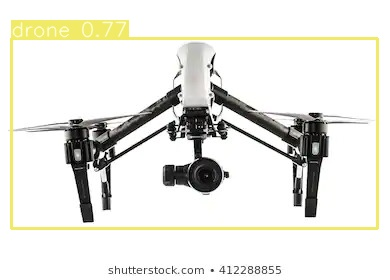

In [43]:
Image(filename='/content/gdrive/My Drive/yolo_v3/output/varna-bulgaria-april-22-2016-260nw-412288855.jpg', width=600)

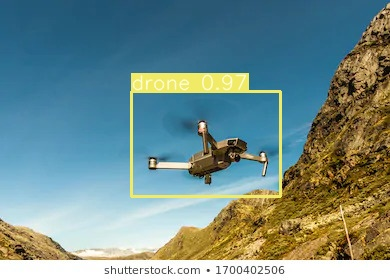

In [44]:
Image(filename='/content/gdrive/My Drive/yolo_v3/output/sognefjellet-norway-july-7-2018-260nw-1700402506.jpg', width=600)

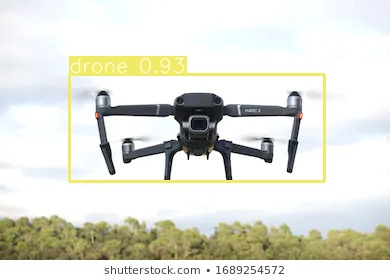

In [45]:
Image(filename='/content/gdrive/My Drive/yolo_v3/output/spain-barcelona-september-2018-dji-260nw-1689254572.jpg', width=600)

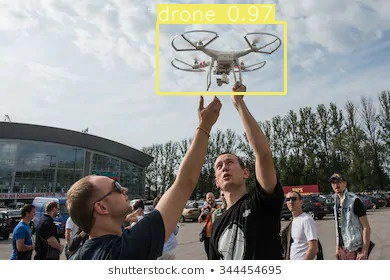

In [46]:
Image(filename='/content/gdrive/My Drive/yolo_v3/output/st-petersburg-russia-july-18-260nw-344454695.jpg', width=600)

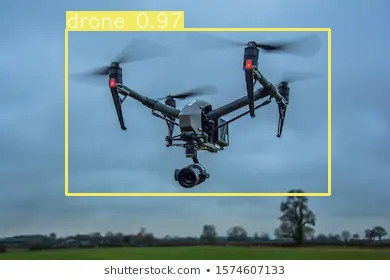

In [47]:
Image(filename='/content/gdrive/My Drive/yolo_v3/output/staffordshire-england-28112019-dji-drone-260nw-1574607133.jpg', width=600)

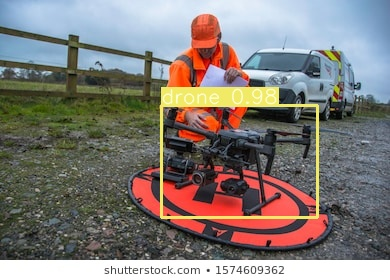

In [48]:
Image(filename='/content/gdrive/My Drive/yolo_v3/output/staffordshire-england-28112019-industrial-workers-260nw-1574609362.jpg', width=600)

In [0]:
!git config --global user.email "abhijitmali@hotmail.com"

In [53]:
!git commit -m "trained for 503 images 1000 epochs"

[master 4a4705c] trained for 503 images 1000 epochs
 4 files changed, 1000 insertions(+), 300 deletions(-)
 rewrite results.png (98%)
 rewrite results.txt (91%)
 create mode 100644 runs/Apr24_05-31-55_5bac06a0deb7/events.out.tfevents.1587706317.5bac06a0deb7.8754.0
 create mode 100644 runs/Apr24_05-35-45_5bac06a0deb7/events.out.tfevents.1587706547.5bac06a0deb7.8921.0


In [54]:
!git push https://@github.com/csharpshooter/YoloV3-1.git --all

Counting objects: 9, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 2.34 MiB | 7.07 MiB/s, done.
Total 9 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/csharpshooter/YoloV3-1.git
   d4e4676..4a4705c  master -> master
